Common stuff

In [2]:
from os.path import join
import re
import time

Sci-stuff

In [3]:
import dicom
import numpy as np
from scipy.misc import imresize

Visualisation stuff

In [4]:
from IPython import display
from matplotlib import pyplot as plt
import pylab as pl

%matplotlib inline

First we need to read the entire dataset.  
We need images as well as pixel spacing (so as to determine scaling factor).

In [5]:
IMAGE_SIZE = 256

In [6]:
prefix = "/home/a.kondyukov/data/Indianapolis_dicom/"

directories = !ls $prefix

all_files = !ls /home/a.kondyukov/data/Indianapolis_dicom/**/*
all_files = all_files[:100]
max_iter = len(all_files)
counter = 0
bad_counter = 0

spacings = np.empty((max_iter, 2))
sizes = np.empty((max_iter, 2))
images = np.empty((max_iter, IMAGE_SIZE, IMAGE_SIZE))

print("Start")
for filename in all_files: 
    print("\rDone: %.2f%%" % (counter / max_iter * 100), end="")

    dicom_obj = dicom.read_file(filename)
    pix_arr = dicom_obj.pixel_array
    images[counter] = imresize(pix_arr, [IMAGE_SIZE, IMAGE_SIZE])
    sizes[counter] = pix_arr.shape
    spacings[counter] = dicom_obj.ImagerPixelSpacing

    counter += 1

Start
Done: 99.00%

Then let's separate lateral images from frontal.
First, let's generate some train data.

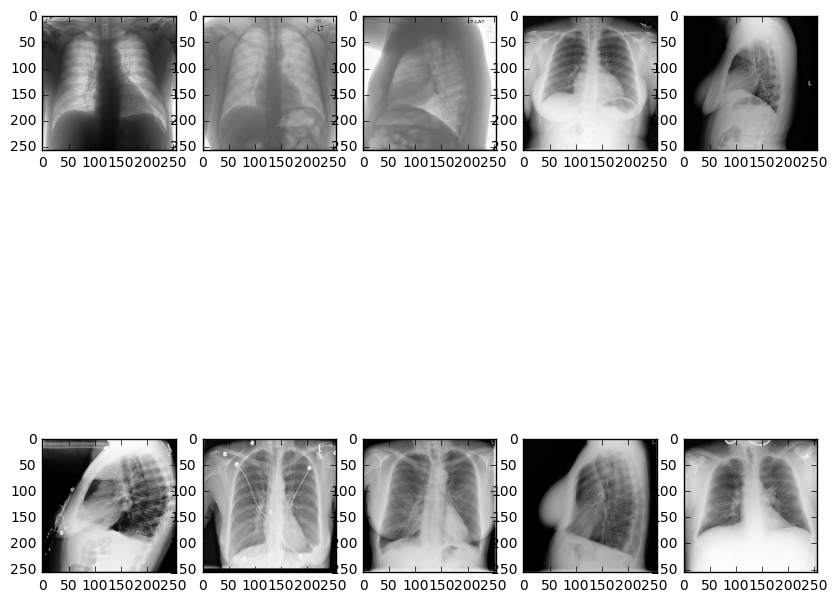

fflfllfflf
6.647332668304443


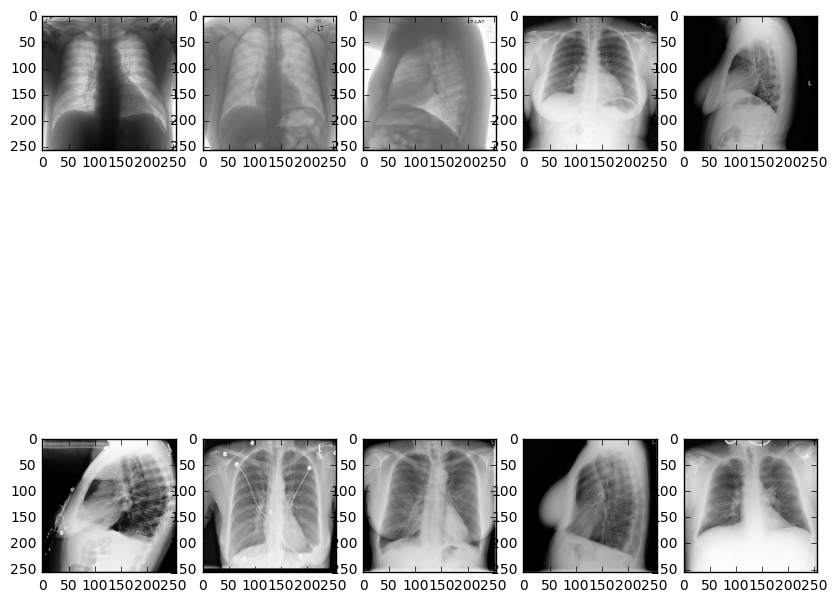

In [23]:
orientations = np.empty((len(images)), dtype=str)

plt.ion()
plt.set_cmap("gray")

cur_images = np.empty((10, IMAGE_SIZE, IMAGE_SIZE))

fig = plt.figure(figsize=(10, 10))
for i, image in enumerate(images):
    start_time = time.time()
    print(i)
    splt = fig.add_subplot(2, 5, i % 10 + 1)
    
    plt.imshow(image)
    
    if i % 10 == 9:
        display.clear_output(wait=False)
        display.display(pl.gcf())
        time.sleep(.1)
        ors = []
        while len(ors) != 10:
            ors = list(input())
            if any([l not in ["l", "f"] for l in ors]):
                ors = []
                continue
        orientations[(i // 10)*10:((i // 10)+1)*10] = ors
    
    print(time.time() - start_time)

In [28]:
features_hor = images.sum(axis=1)[:, ::10]
features_ver = images.sum(axis=1)[:, ::10]

In [52]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [51]:
from xgboost import XGBClassifier

In [47]:
X = np.hstack([features_hor, features_ver])
X /= 256 * 255
Y = np.zeros_like(orientations)
Y[orientations == "l"] = 1

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [56]:
params = {
    "max_depth": [3, 5, 7],
    "n_estimators": [5, 10, 20],
    "learning_rate": [3e-1, 1]
}

clf = XGBClassifier()
grid = GridSearchCV(clf, params)
grid.fit(X_train, Y_train)
print(grid.score(X_test, Y_test))

0.88


In [55]:
grid.best_params_

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 20}

In [41]:
import pandas as pd

In [42]:
pd.Series(orientations).value_counts()

f    55
l    45
dtype: int64

In [1]:
plt.imshow(images[sizes[:, 0] <= sizes[:, 1]][55])

NameError: name 'plt' is not defined

In [ ]:
spacings

In [ ]:
np.array(spacings)

In [ ]:
sizes.min()

In [ ]:
len(filenames)

In [ ]:
plt.imshow(img.pixel_array)

In [ ]:
img.ImagerPixelSpacing

In [ ]:
img.ViewPosition

In [ ]:
DistanceSourceToDetector

In [ ]:
dir(img)